# mnist

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255

train_labels = to_categorical(train_labels)

test_images = test_images.astype('float32') / 255

test_labels = to_categorical(test_labels)

print('train_images {0}, train_labels: {1}, test_images: {2}, test_images: {3}'.format(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape))

170500096/170498071 [==============================] - 4s 0us/step
train_images (50000, 32, 32, 3), train_labels: (50000, 10), test_images: (10000, 32, 32, 3), test_images: (10000, 10)


# custom loss function

In [ ]:
# import tensorflow as tf

# from keras.losses import Loss

# class HuberLoss(Loss):
#   def __init__(self, threshold=1.0, **kwargs):
#     self.threshold = threshold
#     super().__init__(**kwargs)
#   def call(self, y_true, y_pred):
#     error = y_true - y_pred
#     is_small_error = tf.abs(error) < self.threshold
#     squared_loss = tf.square(error) / 2
#     linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
#     return tf.where(is_small_error, squared_loss, linear_loss)
#   def get_config(self):
#     base_config = super().get_config()
#     return {**base_config, 'threshold': self.threshold} 

# custom callback

In [ ]:
from keras.callbacks import Callback
from sklearn.metrics import accuracy_score, cohen_kappa_score

class CustomCallback(Callback):
  
  def __init__(self, model, x_val, y_val):
    self.model = model
    self.x_val = x_val
    self.y_val = y_val
  
  def on_epoch_end(self):
    acc = accuracy_score(np.argmax(clf.predict(x_val), axis=1), y_val)
    qwk = cohen_kappa_score(np.argmax(clf.predict(x_val), axis=1), y_val, weights='quadratic')
    print('Accuracy: {0}, QWK: {1}'.format(acc, qwk))

# custom metric

In [ ]:
# from keras.metrics import Metric, Mean
# import keras

# def create_huber(threshold=1.0):
#     def huber_fn(y_true, y_pred):
#         error = y_true - y_pred
#         is_small_error = tf.abs(error) < threshold
#         squared_loss = tf.square(error) / 2
#         linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
#         return tf.where(is_small_error, squared_loss, linear_loss)
#     return huber_fn

# class HuberMetric(Metric):
#   def __init__(self, threshold=1.0, **kwargs):
#     super().__init__(**kwargs)
#     self.threshold = threshold
#     self.huber_fn = create_huber(threshold)
#     self.total = self.add_weight('total', initializer='zeros')
#     self.count = self.add_weight('count', initializer='zeros')
#   def update_state(self, y_true, y_pred, sample_wight=None):
#     metric = self.huber_fn(y_true, y_pred)
#     self.total.assign_add(tf.reduce_sum(metric))
#     self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
#   def result(self):
#     return self.total / self.count
#   def get_config(self):
#     base_config = super().get_config()
#     return {**base_config, 'threshold': self.threshold}

# class HuberMetric(Metric):
#     def __init__(self, threshold=1.0, **kwargs):
#         super().__init__(**kwargs)
#         self.threshold = threshold
#         self.huber_fn = create_huber(threshold)
#         self.total = self.add_weight("total", initializer="zeros")
#         self.count = self.add_weight("count", initializer="zeros")
#     def update_state(self, y_true, y_pred, sample_weight=None):
#         metric = self.huber_fn(y_true, y_pred)
#         self.total.assign_add(tf.reduce_sum(metric))
#         self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
#     def result(self):
#         return self.total / self.count
#     def get_config(self):
#         base_config = super().get_config()
#         return {**base_config, "threshold": self.threshold}

# class HuberMetric(Mean):
#     def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
#         self.threshold = threshold
#         self.huber_fn = create_huber(threshold)
#         super().__init__(name=name, dtype=dtype)
    
#     def update_state(self, y_true, y_pred, sample_weight=None):
#         metric = self.huber_fn(y_true, y_pred)
#         super(HuberMetric, self).update_state(metric, sample_weight)
    
#     def get_config(self):
#         base_config = super().get_config()
#         return {**base_config, "threshold": self.threshold}

# create model

In [ ]:
from keras.models import Sequential
from keras.applications import VGG16
from keras.layers import Flatten, Dense

model = Sequential()

conv_base = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(32, 32, 3),)

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# model.compile(optimizer='adam',
#               loss=HuberLoss(2.),
#               metrics=[HuberMetric(2.0)],)

!pip install tensorflow_addons
import tensorflow_addons as tfa

model.compile(optimizer='adam',
              loss=tfa.losses.WeightedKappaLoss(num_classes=10),
              metrics=['accuracy', tfa.metrics.CohenKappa(num_classes=10)],)

model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 25s 38ms/step - loss: 3.2938e-04 - accuracy: 0.1007 - cohen_kappa: 6.5316e-04 - val_loss: 9.5367e-07 - val_accuracy: 0.1016 - val_cohen_kappa: 0.0000e+00
Epoch 2/5
625/625 [==============================] - 23s 38ms/step - loss: 9.5367e-07 - accuracy: 0.0996 - cohen_kappa: -1.0474e-08 - val_loss: 9.5367e-07 - val_accuracy: 0.1016 - val_cohen_kappa: 0.0000e+00
Epoch 3/5
625/625 [==============================] - 24s 38ms/step - loss: 9.5367e-07 - accuracy: 0.0984 - cohen_kappa: -9.6167e-09 - val_loss: 9.5367e-07 - val_accuracy: 0.1016 - val_cohen_kappa: 0.0000e+00
Epoch 4/5
625/625 [==============================] - 24s 38ms/step - loss: 9.5367e-07 - accuracy: 0.1006 - cohen_kappa: -7.8076e-09 - val_loss: 9.5367e-07 - val_accuracy: 0.1016 - val_cohen_kappa: 0.0000e+00
Epoch 5/5
625/625 [==============================] - 24s 38ms/step - loss: 9.5367e-07 - accuracy: 0.0978 - cohen_kappa: -1.1711e-08 - val_loss: 9.5367e-07 - val_accuracy

# confusion matrix

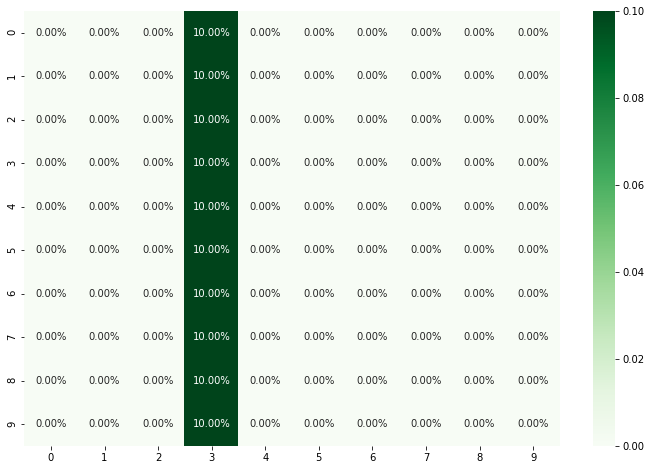

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predicted = np.argmax(model.predict(test_images), axis=-1)
labels = np.argmax(test_labels, 1)
cf_matrix = confusion_matrix(labels, predicted)

plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')